In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:

def readData(filepath):
    ds = pd.read_csv(filepath)
    data = ds.values
    xtrain = data[:,0:-1]
    ytrain = data[:,-1]
    
    #print(xtrain.shape)
    #print(ytrain.shape)
    return xtrain,ytrain



In [152]:
filepath = './mnist/train.csv'
xtrain,ytrain = readData(filepath)


In [153]:
ytrain[:100]

array([0, 3, 6, 4, 9, 4, 1, 2, 2, 8, 1, 9, 9, 3, 1, 1, 8, 2, 5, 5, 0, 9,
       4, 2, 4, 5, 3, 2, 8, 5, 1, 1, 6, 9, 4, 4, 9, 0, 7, 4, 0, 4, 0, 9,
       1, 8, 9, 0, 3, 5, 2, 8, 4, 9, 7, 1, 8, 6, 4, 9, 1, 5, 1, 1, 7, 6,
       8, 3, 9, 6, 3, 0, 0, 1, 1, 0, 7, 5, 0, 6, 3, 8, 6, 4, 3, 0, 1, 6,
       8, 0, 0, 3, 4, 5, 8, 9, 2, 4, 2, 5], dtype=int64)

4
784
19999
(19999, 784)


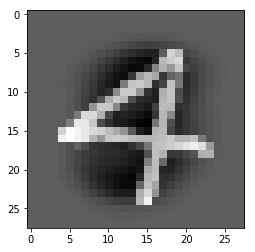

In [157]:
def printImage(i,xtrain,ytrain):
    """Prints the i th row and label from dataset
    Args:
        Accepts an integer i, the row number
    Outputs:
        Image and Label
    """
    image = xtrain[i]
    label = ytrain[i]
    
    print(label)
    img = image.reshape((28,28))
    plt.figure(0)
    plt.imshow(img,cmap='gray')
    
    
printImage(3,xtrain,ytrain)

# Normalize the Data
xtrain = np.asarray(xtrain)
xtrain = (xtrain-xtrain.mean(axis=0))/x.std()

print(xtrain.shape)

In [198]:
print(xtrain)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [199]:
from random import randint

x = np.asarray(xtrain)
print(x.shape)


(19999, 784)


In [200]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C = C
        
    def loss(w,x,y):
        loss = 0.5*np.dot(w,w.T)
        
        for i in range(x.shape[0]):
            ti = y[i]*(np.dot(w,x[i].T))
            if ti!=0:
                loss += self.C*(1-ti)
        
        return loss
                
    def solve(x,y,solver="Pegasos",learning_rate=0.01):
        if(solver=="Pegasos"):
            no_of_features = x.shape[1]
            no_of_samples = x.shape[0]
            n = learning_rate
            c = self.C
            w = np.zeros((no_of_features,))
            b = 0
            
            losses = []
            
            # Apply the Gradient Update Rule
            for t in range(1000):
                
                i  = randint(0,no_of_samples)
                ti = y[i]*(np.dot(w,x[i].T+b))
                
                l = loss(w,x,y)
                losses.append(l)
                
                if ti>1:
                    w = (1-n)*w
                    b = b
                else:
                    w = w - n*w + n*c*y[i]*x[i]
                    b = b + n*c*y[i]
                    
            return w,losses

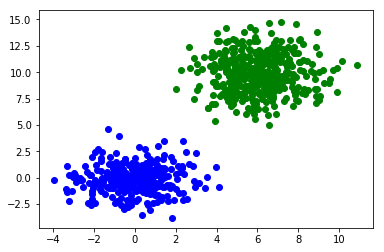

In [201]:
mean = [0, 0]
cov = [[2, 0], [0, 2]]

mean1 = [6, 10]
cov1 = [[2, 0], [0, 3]]
data1 = np.random.multivariate_normal(mean,cov,300)
data2 = np.random.multivariate_normal(mean1,cov1,400)

plt.scatter(data1[:,0],data1[:,1],color='blue')
plt.scatter(data2[:,0],data2[:,1],color='green')

plt.show()


(700, 2)


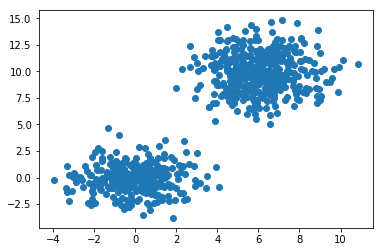

(700,)


In [202]:
data = np.zeros((700,2))
data[:300,:] = data1
data[300:,:] = data2

print(data.shape)
plt.scatter(data[:,0],data[:,1])
plt.show()

labels = np.zeros((700,))
labels[:300] = -1
labels[300:] = 1

print(labels.shape)
 #ti = y[i]*(np.dot(w,x[i].T))

In [144]:
svm = SVM()
#w,losses = svm.solve(data,labels)

In [158]:
from sklearn import svm

In [205]:
cf1 = svm.SVC(kernel='linear')
cf1.fit(data, labels)
w = cf1.coef_
b = cf1.intercept_


print(cf1.classes_)
#print(cf1.score(data,labels))
print(w[0][0])


[-1.  1.]
0.5111226225986361


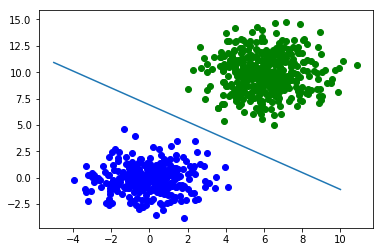

[10.91766345 10.28458489  9.65150633  9.01842777  8.38534921  7.75227065
  7.11919209  6.48611353  5.85303497  5.21995642  4.58687786  3.9537993
  3.32072074  2.68764218  2.05456362  1.42148506  0.7884065   0.15532794
 -0.47775062 -1.11082918]


In [204]:
xt = np.linspace(-5,10,20)
yt = -(w[0,0]*xt + b)/w[0,1]

plt.scatter(data1[:,0],data1[:,1],color='blue')
plt.scatter(data2[:,0],data2[:,1],color='green')

#plt.scatter(data[:,0],data[:,1])
plt.plot(xt,yt)
plt.show()
print(yt)